# Analyzing House Sales Data with Python

***
# Introduction

This project analyzes a dataset regarding the house sale prices in King County, USA. The project consists of the following sections: (1) Importing the dataset (from a csv file format to Pandas dataframe) (2) Data Wrangling (identification and replacement of missing values) (3) Exploratory Data Analysis (statistics summary, correlation, boxplot, regression plot) (4) Model Development (simple and multiple linear regression) (5) Model Evaluation and Refinement (Ridge regression and a second order polynomial transform) (6) Findings and Implications

Author: Avery Jan

Date: 5-10-2022 


# Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [2]:
# Import required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

 
 # 1. Importing Dataset
 

In [7]:
# Load the csv file and read the file into a dataframe.
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [8]:
# Display the first 5 columns of the dataframe.
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Display the data types of each column in the dataframe.
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
# Get a statistical summary of the dataframe.
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



# 2. Data Wrangling


In [11]:
# Drop columns "id" and "Unnamed: 0" from the "df" dataframe.
df.drop(["id", "Unnamed: 0"], axis = 1, inplace=True)

# Get a statistical summary of the resulting dataset following the dropping of the two columns.  
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# Find the number of missing values in the columns, "bedrooms" and "bathrooms."
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [13]:
# Find the mean of the column "bedrooms."
mean=df['bedrooms'].mean()

# Replace the missing values of the column "bedrooms" with the mean of the column "bedrooms."
# set the inplace parameter to True to ensure the changes are made in the dataframe.
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [14]:
# Find the mean of the column "bathrooms."
mean=df['bathrooms'].mean()

# Replace the missing values of the column "bathrooms" with the mean of the column "bathrooms."
# set the inplace parameter to True to ensure the changes are made in the dataframe.
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [15]:
# Confirm that both columns,'bedrooms' and 'bathrooms' no longer contain missing values.
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0



# 3. Exploratory Data Analysis


In [16]:
# Count the number of houses with unique floor values and convert the sums for all unique floor values to a dataframe. 
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Text(0.5, 1.0, 'Waterfront vs. Price')

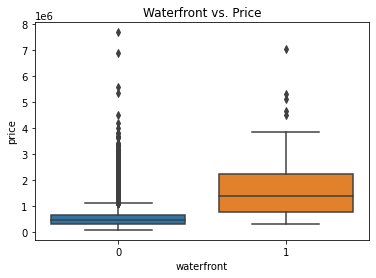

In [27]:
# Visualize the range, mean, and outliers of the prices of houses that have a waterfront view (represented as '1') 
# and don't have a waterfront view ('0') by creating a boxplot for either case.
sns.boxplot(x="waterfront", y="price", data=df)
plt.title('Waterfront vs. Price')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

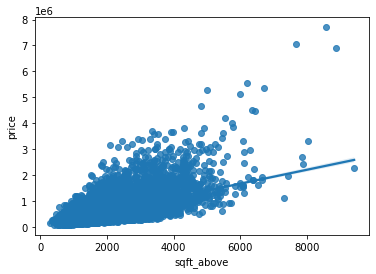

In [68]:
# Visualize the correlation relationship between sqft_above and price using regplot in the seaborn library.
sns.regplot(x='sqft_above', y='price', data=df)

In [19]:
# Determine the correlation bewteen price and the features of houses using the corr() method in Pandas.
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


# 4. Model Development


In [20]:
# Fit a linear regression model using the feture, 'long' (longitude).
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

# Calculate R^2 value.
lm.score(X, Y)

0.00046769430149007363

In [54]:
# Fit a linear regression model to predict the 'price', using the feature, 'sqft_living'. 

X1 = df[['sqft_living']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y1)

print("The predicted values are:" + str(lm1.predict(X1)))
print()

# Calculate R^2 value. 
print("The value of R^2 is:" + str(lm1.score(X1, Y1)))

The predicted values are:[287555.06702451 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]

The value of R^2 is:0.4928532179037931


In [47]:
# Fit a linear regression model to predict the 'price' using the features in the 'feature" list'.
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
X2 = df[features]
Y2 = df['price']
lm2 = LinearRegression()
lm2.fit(X2,Y2)
lm2.predict(X2)

array([284903.35248866, 661991.35248866, 309223.35248866, ...,
       303847.35248866, 428231.35248866, 303625.35248866])

In [48]:
# Calculate R^2 value of the above linear regression model. 
lm2.score(X2, Y2)

0.6576569675583581

In [61]:
# Create a list of tuples that is to be used in creating a pipeline object below.

# The first element in each tuple contains the name of the estimator (e.g. 'scale' in the first tuple).
# The second element in each tuple contians the model constructor (e.g. 'StandardScaler()' in the frst tuple)

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [67]:
# Use the list of tuples, "Input", to create a pipeline object for predicting the 'price'
pipe=Pipeline(Input)

# Fit the pipeline object using the features in the list, "features."
pipe.fit(df[features],df['price'])
print(pipe.predict(df[features]))
print()

# Calculate the R^2 value.
pipe.score(df[features],df['price'])

[349662.25  559094.    449572.5   ... 417216.5   459667.875 417162.5  ]



0.7513417707683823


# 5. Model Evaluation and Refinement


In [22]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [23]:
# Split the data into training and testing sets for the evalution of models later. 
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [24]:
# Import the necessary module for the evaluation of the model. 
from sklearn.linear_model import Ridge

In [25]:
# Create a Ridge regression object and set the regularization parameter (alpha) to 0.1.
RigeModel=Ridge(alpha=0.1)

# Fit the Ridge regression object using the traing data
RigeModel.fit(x_train, y_train)

# Calculate the R^2 value using the test data
RigeModel.score(x_test, y_test)

0.6478759163939113

In [26]:
# Perform a second order polynomial transform on both the training data and testing data. 
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

# Create a Ridge regression object and set hte regularization parameter (alpha) to 0.1.
RigeModel=Ridge(alpha=0.1)

# Fit the Ridge regression object using the traing data
RigeModel.fit(x_train_pr, y_train)

# Calculate the R^2 value using the test data
RigeModel.score(x_test_pr, y_test)

0.7002744273468813


# 6. Findings and Implications

1. The missing values in the 'bedrooms' and 'bathrooms' columns were replaced with the means of their columns.
2. Houses with one floor is the most common type in this area. The more floors a house has, the smaller number of houses of
   that type are in this area.
3. Boxplots of 'price' regarding 'waterfront' feature reflects three aspects of the price of houses having a waterfront view:
   (i) on average, more expensive (ii) a wider price interquartile range (iii) less outliers than those without a waterfront view.
4. Two things can be derived from the regression plot of price vs. sqft_above (square footage of house apart from basement):
   (i) Price and square footage are positively correlated. That is, the more footage, the higher the price. (ii) For those
   extremely large houses, many of them are priced disproportionally high. This might be the added value of luxurious things installed on the property.
5. Correlation analysis reveals that the top five features positively correlated with the price are: (i) sqft_living (ii) grade
   (iii) sqft_above (iv) sqft_living15 (v) bathrooms (number of bathrooms). It is possible that high intercorrelation among these features exists. This could impede the development of regression models using these as predictors. 
6. Model development started with building two Simple Linear Regression models using one feature of the house as the sole predictor. The model using longitude ("long') as the predictor has an extremely low R^2 value of 0.000467, which is nearly zero. Thus, longitude cannot explain much of the movement of price. This is not surprising because it has the lowest positive correlation coefficient among all features of the house (see correlation analysis). On the contrary, the model using sqft_living as the predictor, has a R^2 value of 0.492. That is, about half of the price movement can be explained by sqft_living of the house. This makes sense because sqft_living has the highest positive correlation coefficient among all features of the house.
7. Model development continued with building a Multiple Linear Regression model. This model used the features that 
   have a correlation coefficient equal to or greater than 0.25 as the predictors. There are eleven predictors total. The R^2 value of this model is 0.658, which is much higher than 0.492 from the model using sqft_living as the only predictor. 
8. By incorporating polynomial terms in the Multiple Linear Regression model, the R^2 value was raised to 0.751 from 0.658. 
9. Despite the much better R^2 value of the Multiple Linear Regression model with polynomial terms, the multicollinearity among the predictors could cause the problem of overfitting. To overcome this problem, a Ridge Regression model was built. The Ridge Regression model has a R^2 value of 0.647, down from 0.751 of the Multiple Linear Regression model with polynomial terms. 
10. To improve the Ridge Regression model, a second order polynomial transform was performed on both the training and testing
    data. The R^2 value of this enhanced Ridge Regression model was lifted to 0.700 from 0.647. Although this final Ridge 
    Regression model has a slightly lower R^2 value (0.700) than that of the Multiple Linear Regression models containing
    polynomial terms (0.751), this Ridge Regression model is the best model of all because this enhanced Ridge Regression model
    alleviates the overfitting problem, and therefore, can make more accurate predictions about the price of houses than the
    Linear Regression model containing polynomial terms.